# EDA House Sales Prediction

SUMBER: https://www.kaggle.com/harlfoxem/housesalesprediction

### Importing Common Package

In [1]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy.stats import skew
import folium
import sidetable as stb


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#untuk melihat versi dari pandas, matplotlib, dan seaborn
print('pandas version:', pd.__version__,'per Oktober 2020')
print('matplotlib version:', matplotlib.__version__,'per Oktober 2020')
print('seaborn version:', sns.__version__,'per Oktober 2020')

pandas version: 1.0.1 per Oktober 2020
matplotlib version: 3.1.3 per Oktober 2020
seaborn version: 0.10.0 per Oktober 2020


### df Description

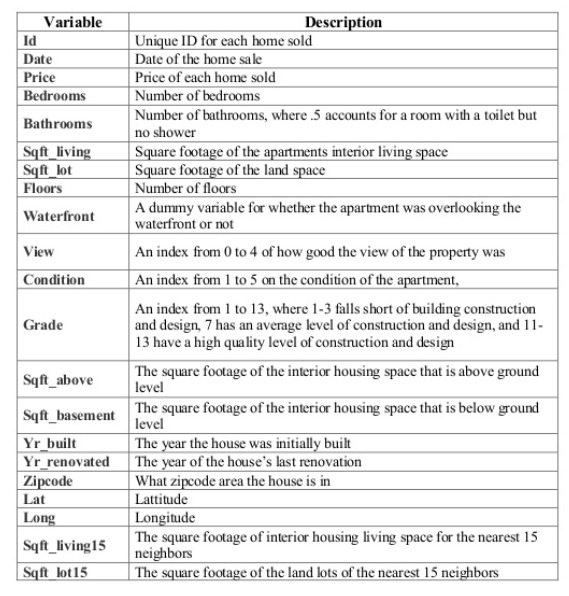

In [3]:
Image("infohouse.jpg")

In [4]:
# Read df
df = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df_describe =[]

for i in df.columns: 
    df_describe.append([ #add i, type df, how many NaN, percentage , how many unique, unique value 
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique() 
    ])

In [6]:
pd.DataFrame(data=df_describe, columns=['df','df Types','Null','Null Percentage','Unique','Unique Sample'])


,df,df Types,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087..."
1,date,object,0,0.0,372,"[20141013T000000, 20141209T000000, 20150225T00..."
2,price,float64,0,0.0,4028,"[221900.0, 538000.0, 180000.0, 604000.0, 51000..."
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]"
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060..."
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ..."
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


 Dari hasil tersebut tidak terdapat df null, sehingga tidak perlu dilakukan penyesuaian df.
 Namun untuk kolom date akan dilakukan manipulasi karena tipe dfnya masih object

### df Manipulating and Cleansing

In [7]:
''' mengubah kolom date menjadi datetime dan mengeskpor kolom tersebut menjadi kolom hari (angka), bulan (angka), bulan (nama), 
serta tahun untuk keperluan analisis dan visualisasi'''
df['date'] = pd.to_datetime(df['date'])
df["day"] = df["date"].apply(lambda x : x.day)
df["monthInt"] = df["date"].apply(lambda x : x.month)
df["month"] = df["date"].apply(lambda x : x.month_name())
df["year"] = df["date"].apply(lambda x : x.year)



In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,month,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,October,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,December,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,February,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,December,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,February,2015


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,15.688197,6.574423,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,8.635063,3.115308,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,8.000000,4.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,16.000000,6.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,23.000000,9.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,31.000000,12.000000,2015.000000


In [10]:
#untuk mengecek informasi dari jumlah kolom, baris dan nama kolom
print("Jumlah Kolom: ",df.shape[1]) #indexing 1
print("Jumlah Baris: ",df.shape[0]) #indexing 0
print("Daftar kolom: ", df.columns)

Jumlah Kolom:  25
Jumlah Baris:  21613
Daftar kolom:  Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'day', 'monthInt',
       'month', 'year'],
      dtype='object')


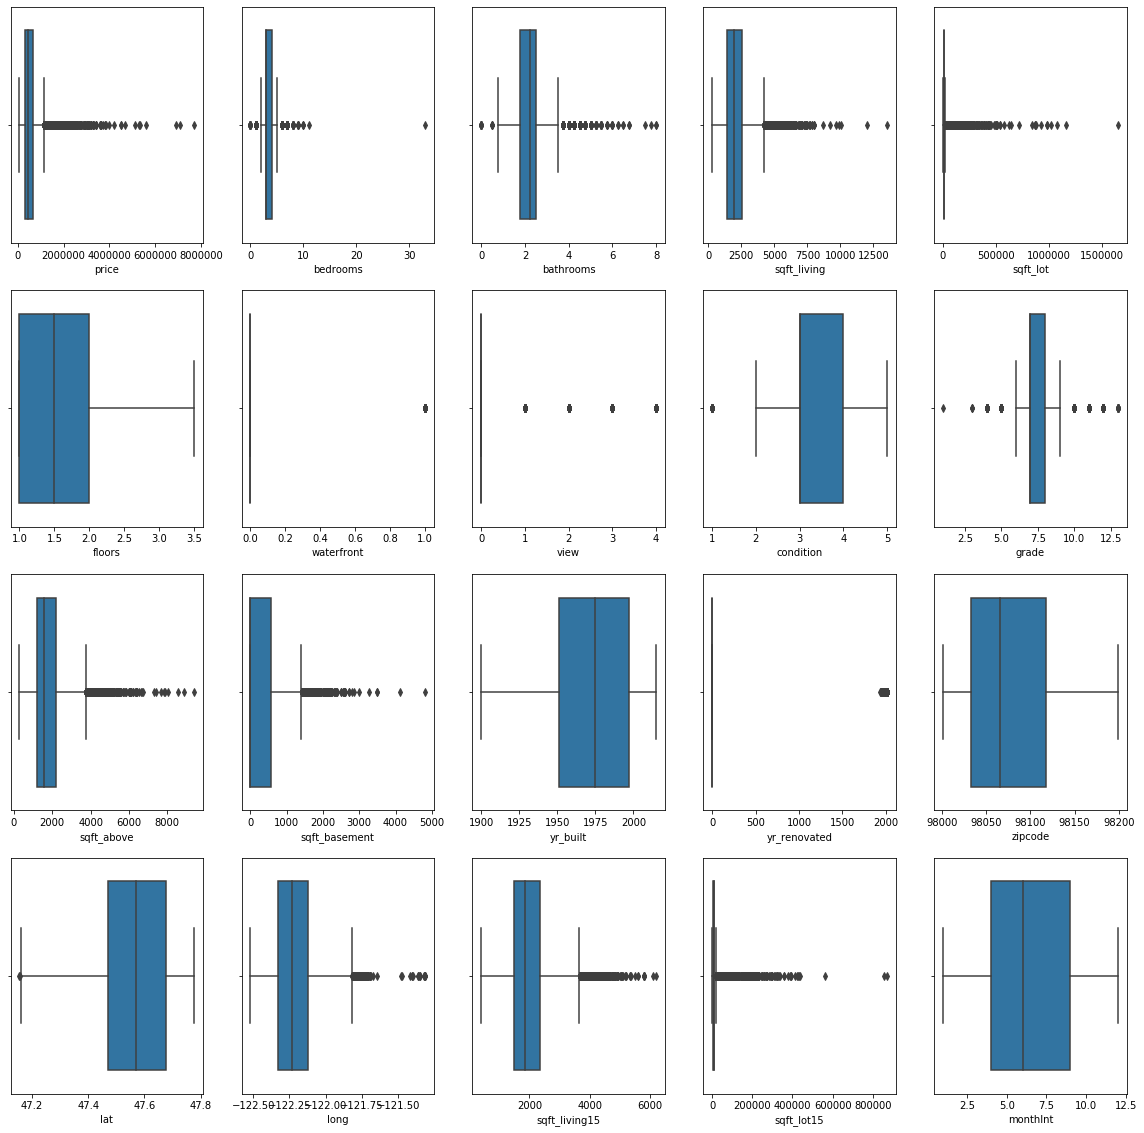

In [11]:
#melakukan checking outlier
df_describe = df.drop(columns = ['id', 'day', 'month', 'year','date'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

 Dari df outliers tersebut ada beberapa df yang cukup menarik untuk dibahas yaitu terdapat df rumah yang tidak memiliki kamar mandi, dan juga terdapat df rumah yang memiliki kamar lebih dari 30, sehingga akan dilakukan pengecekan lagi

In [12]:
df[df['bedrooms']>=30]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,month,year
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,25,6,June,2014


setelah dilakukan pengecekan ada hal yang sangat jangal, karena dirumah yang memiliki 33 kamar tersebut, hanya memiliki 1,75 bathroom, sehingga saya mengasumsikan bahwa df tersebut typo dan diubah menjadi 3

In [13]:
df.loc[df[df["bedrooms"] == 33].index, "bedrooms"] = 3

In [14]:
df[df['bedrooms']>=30]
## sudah tidak ada df rumah yang memiliki kamar diatas 30

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,month,year


In [15]:
df[df['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,month,year
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,12,6,June,2014
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,17,2,February,2015
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,5,2,February,2015
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549,4,11,November,2014
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,24,6,June,2014
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,29,4,April,2015
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,23,12,December,2014
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290,18,9,September,2014
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600,13,4,April,2015
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,26,9,September,2014


setelah dilakukan pengecekan untuk df rumah yang tidak memiliki kamar mandi, ditemukan bahwa ada beberapa kamar yang memiliki harga diatas 1 juta dan juga luas tanahnya lebih dari 20 ribu. sehingga saya memutuskan untuk melakukan filna median ke kolom yang memiliki nilai 0

In [16]:
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())

In [17]:
df[df['bathrooms']==0]
#sudah tidak ada df rumah yang tidak memiliki kamar mandi

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,month,year


untuk memudahkan dalam melakukan analisa, saya akan melakukan feature engine pada kolom quality, umur bangunan, dan harga rumah

In [18]:
bin_quality = [0, 5, 9, 13]
label = ['Low','Medium','High']

df['Quality'] = pd.cut(df['grade'], bins= bin_quality, labels =label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,month,year,Quality
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,October,2014,Medium
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,December,2014,Medium
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,February,2015,Medium
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,December,2014,Medium
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,February,2015,Medium


Untuk memudahkan dalam melakukan analisis, akan dilakukan bining terhadap bangunan yang sudah di renovasi atau belum

In [19]:
bin_renov = [-0.1, 0, df['yr_renovated'].max()]
label = ['Belum Renovasi','Sudah Renovasi']

df['stat_renov'] = pd.cut(df['yr_renovated'], bins= bin_renov, labels =label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,month,year,Quality,stat_renov
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,October,2014,Medium,Belum Renovasi
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,December,2014,Medium,Sudah Renovasi
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,February,2015,Medium,Belum Renovasi
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,December,2014,Medium,Belum Renovasi
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,February,2015,Medium,Belum Renovasi


In [20]:
df['stat_renov'].unique()

[Belum Renovasi, Sudah Renovasi]
Categories (2, object): [Belum Renovasi < Sudah Renovasi]

In [21]:
df['price'] = df['price'].apply(np.int64)


In [22]:
bin_price =[0,100000,500000,1000000, 2000000, df['price'].max()]
label_price = ['<=100k', '100k-500k','500k-1mil','1mil-2mil', '2mil<']

df['price_level'] = pd.cut(df['price'], bins = bin_price, labels = label_price)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,monthInt,month,year,Quality,stat_renov,price_level
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,October,2014,Medium,Belum Renovasi,100k-500k
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,December,2014,Medium,Sudah Renovasi,500k-1mil
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,February,2015,Medium,Belum Renovasi,100k-500k
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,December,2014,Medium,Belum Renovasi,500k-1mil
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,February,2015,Medium,Belum Renovasi,500k-1mil


In [23]:
grafik_penjualan= pd.crosstab(index=[df['year'], df['monthInt'],df['month']], columns= 'jumlah')
grafik_penjualan


col_0                    jumlah
year monthInt month            
2014 5        May          1768
     6        June         2180
     7        July         2211
     8        August       1940
     9        September    1774
     10       October      1878
     11       November     1411
     12       December     1471
2015 1        January       978
     2        February     1250
     3        March        1875
     4        April        2231
     5        May           646

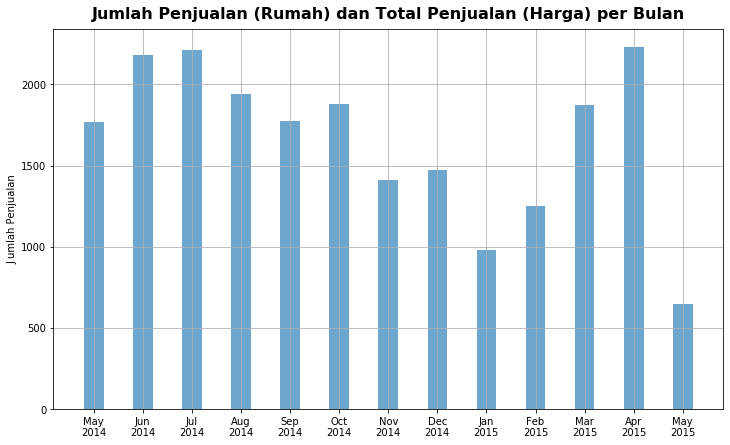

In [24]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.bar(df.drop_duplicates(["month", "year"]).sort_values(["year", "monthInt"])["month"].apply(lambda x : x[:3]) + "\n" + df.drop_duplicates(["month", "year"]).sort_values(["year", "monthInt"])["year"].astype(str),
       df.groupby(["monthInt", "year"]).count().sort_values(["year", "monthInt"])["price"],
       alpha = 0.65,
       width = 0.4,
       linewidth = 1)

ax.set_ylabel("J umlah Penjualan")

ax.set_title("Jumlah Penjualan (Rumah) dan Total Penjualan (Harga) per Bulan", fontdict = {'fontsize': 16,
        'fontweight' : "bold",
        'color' : "black",
        'verticalalignment': 'baseline',
        'horizontalalignment': "center"
        }, y = 1.01)

plt.grid(True)
plt.show()

## Problem Statement:
Berdasarkan grafik data diatas, selama setahun terakhir jumlah penjualan dibulan terakhir tepatnya bulan may, mengalami penurunan yang sangat tajam, sehingga nantinya perlu diteliti lebih lanjut oleh tim Data agar kedepannya penjualan rumah mengalami peningkatan
## Goals :
- Membuat prediksi harga penjualan untuk rumah yang belum terjual
- Memberi rekomendasi mengenai penjualan rumah

# EDA

In [ ]:
# Univariate

In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'day', 'monthInt',
       'month', 'year', 'Quality', 'stat_renov', 'price_level'],
      dtype='object')

In [34]:
df.stb.freq(['price_level'], cum_cols =False)

,price_level,count,percent
0,100k-500k,12529,57.969740
1,500k-1mil,7588,35.108500
2,1mil-2mil,1267,5.862213
3,2mil<,198,0.916115
4,<=100k,31,0.143432


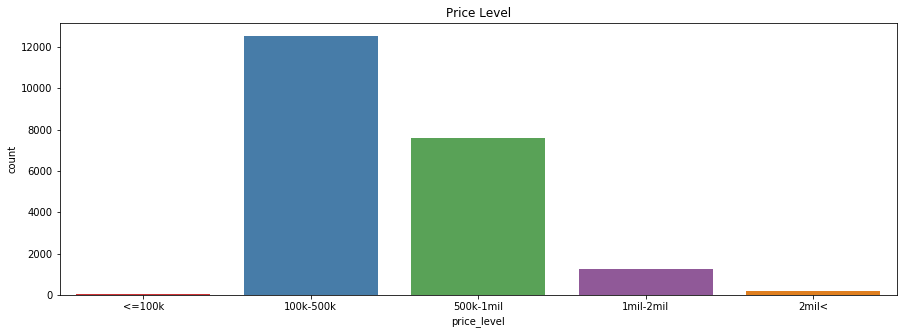

In [35]:
plt.figure(figsize = (15,5))
sns.countplot(df['price_level'], palette='Set1')
plt.title("Price Level")


plt.show()

In [27]:
df.stb.freq(['stat_renov'], cum_cols =False)

,stat_renov,count,percent
0,Belum Renovasi,20699,95.771064
1,Sudah Renovasi,914,4.228936


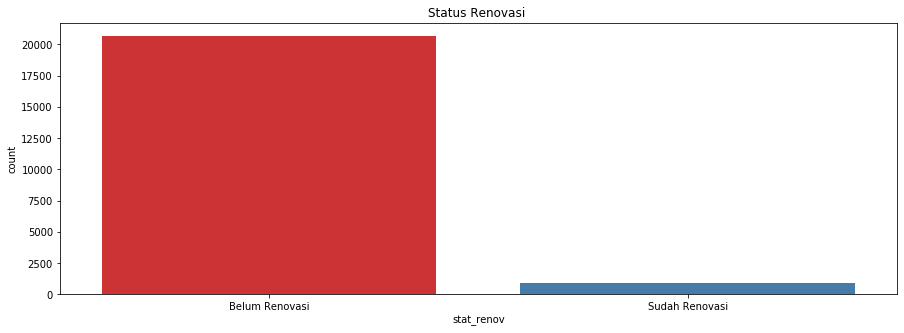

In [36]:
plt.figure(figsize = (15,5))
sns.countplot(df['stat_renov'], palette='Set1')
plt.title("Status Renovasi ")
plt.show()

In [28]:
df.stb.freq(['Quality'], cum_cols =False)

,Quality,count,percent
0,Medium,19702,91.158099
1,High,1636,7.569518
2,Low,275,1.272382


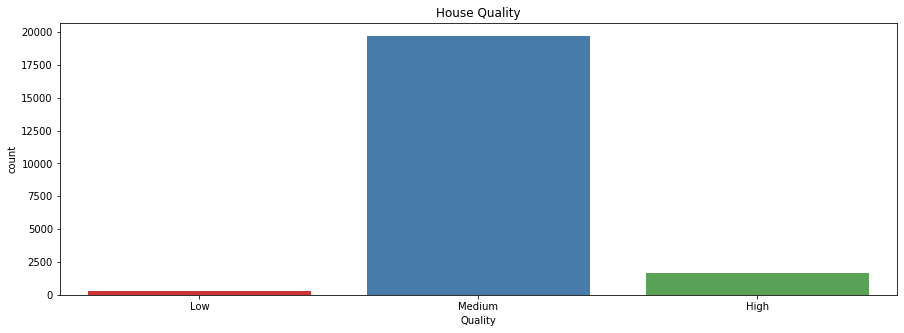

In [37]:
plt.figure(figsize = (15,5))
sns.countplot(df['Quality'], palette='Set1')
plt.title("House Quality")


plt.show()

In [29]:
df.stb.freq(['bedrooms'], cum_cols =False)

,bedrooms,count,percent
0,3,9825,45.458752
1,4,6882,31.841947
2,2,2760,12.770092
3,5,1601,7.407579
4,6,272,1.258502
5,1,199,0.920742
6,7,38,0.175820
7,8,13,0.060149
8,0,13,0.060149
9,9,6,0.027761


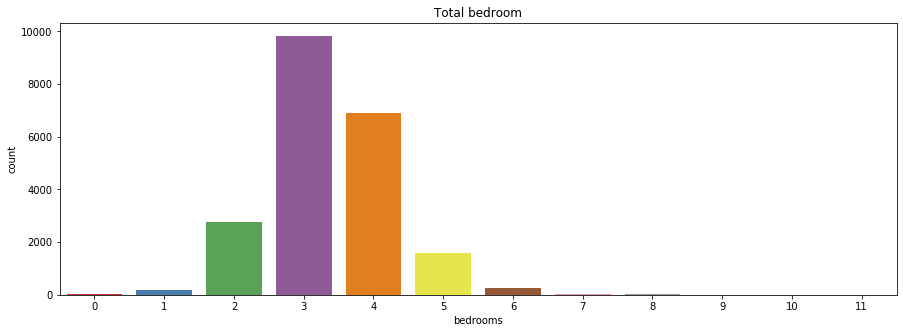

In [38]:
plt.figure(figsize = (15,5))
sns.countplot(df['bedrooms'], palette='Set1')
plt.title("Total bedroom")


plt.show()

In [30]:
df.stb.freq(['bathrooms'], cum_cols =False).head(10)

,bathrooms,count,percent
0,2.50,5380,24.892426
1,1.00,3852,17.822607
2,1.75,3048,14.102623
3,2.25,2057,9.517420
4,2.00,1930,8.929811
5,1.50,1446,6.690418
6,2.75,1185,5.482811
7,3.00,753,3.484014
8,3.50,731,3.382224
9,3.25,589,2.725212


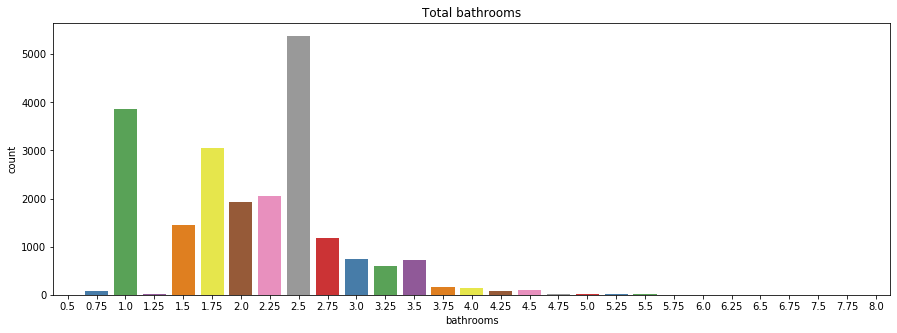

In [39]:
plt.figure(figsize = (15,5))
sns.countplot(df['bathrooms'], palette='Set1')
plt.title("Total bathrooms")


plt.show()

In [ ]:
## Multivariate

In [31]:

df.groupby('Quality')['price'].median() / df['price'].median()



Quality
Low       0.500000
Medium    0.966667
High      2.307778
Name: price, dtype: float64

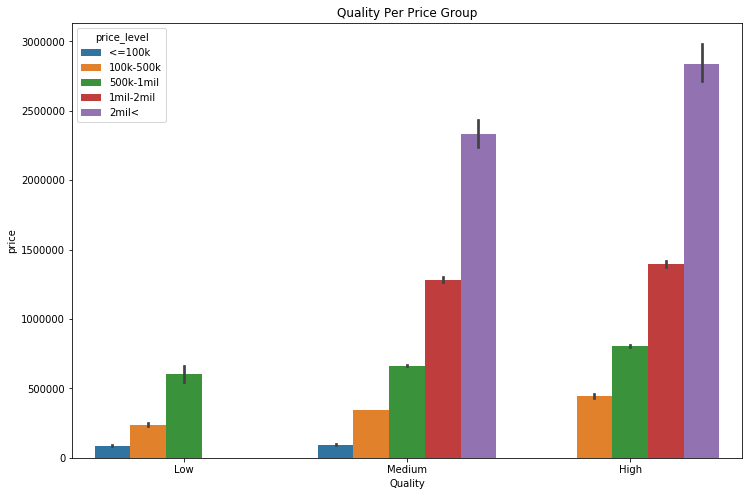

In [67]:
plt.figure(figsize = (12 , 8))
sns.barplot(hue = 'price_level', x = 'Quality', y ='price',data = df)
plt.title('Quality Per Price Group')

plt.show()

In [ ]:
# rumah yang dijual dengan kualitas tinggi , memiliki gap yang cukup besar yaitu 3x lipat dibanding dijual diharga standard

In [52]:
df.groupby('bedrooms')['price'].median() / df['price'].median()

bedrooms
0     0.640000
1     0.664444
2     0.831111
3     0.917778
4     1.222217
5     1.377778
6     1.444444
7     1.619067
8     1.555556
9     1.815556
10    1.466667
11    1.155556
Name: price, dtype: float64

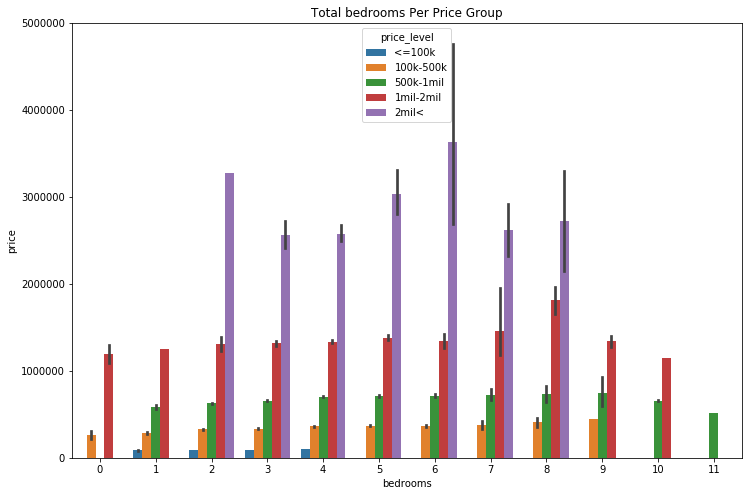

In [60]:
plt.figure(figsize = (12 , 8))
sns.barplot(hue = 'price_level', x = 'bedrooms', y ='price',data = df)
plt.title('Total bedrooms Per Price Group')

plt.show()

In [63]:
df.groupby('bathrooms')['price'].median() / df['price'].median()


bathrooms
0.50     0.586667
0.75     0.607778
1.00     0.711111
1.25     1.147778
1.50     0.822222
1.75     0.939778
2.00     0.940556
2.25     1.048889
2.50     1.111000
2.75     1.344444
3.00     1.333333
3.25     1.855556
3.50     1.822222
3.75     2.377778
4.00     2.347222
4.25     3.066667
4.50     2.358889
4.75     5.111111
5.00     3.166667
5.25     3.144444
5.50     5.194444
5.75     4.288889
6.00     6.427778
6.25     6.875556
6.50     3.798767
6.75     6.075556
7.50     1.000000
7.75    15.300000
8.00    11.088889
Name: price, dtype: float64

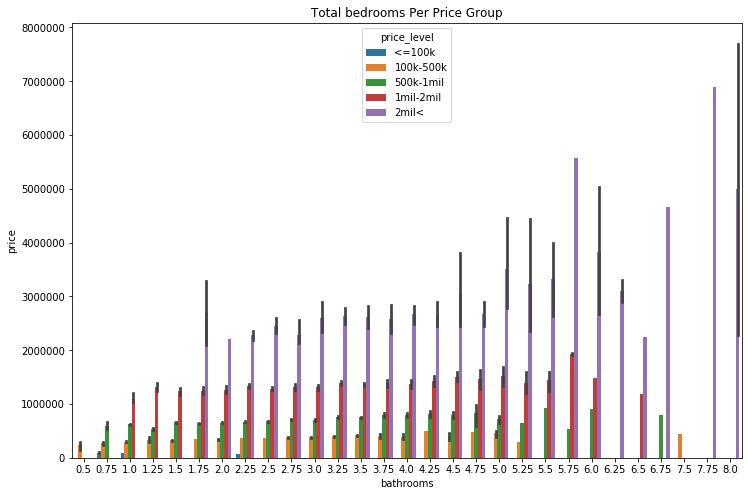

In [62]:
plt.figure(figsize = (12 , 8))
sns.barplot(hue = 'price_level', x = 'bathrooms', y ='price',data = df)
plt.title('Total bedrooms Per Price Group')

plt.show()

## Kesimpulan
- Dari penjualan rumah dari tahun 2014 -2015, rumah yang dijual dengan kondisi belum renovasi sebanyak 95,7%. sehingga besar kemungkinan hal itu yang menyebabkan terjadinya penurunan, oleh karena itu dihimbau untuk melakukan renovasi sebelum hendak dijual karena menurut data rumah yang memiliki kualitas tinggi, harga penjualannya 3x lipat dari rumah yang memiliki kualitas biasa.
- Mayoritas rumah yang dijual adalah rumah yang memiliki 3 kamar tidur dan 2 kamar mandi dan 1 toilet
- Range harga rumah yang dijual adalah dari 100k - 500 k